In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
!git clone https://github.com/muhammedtalo/COVID-19.git

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import shutil
import os

In [ ]:
#to read data from csv
df = pd.read_csv("/content/Data_Entry_2017_v2020_clear.csv",delimiter=";")

In [ ]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


<BarContainer object of 100 artists>

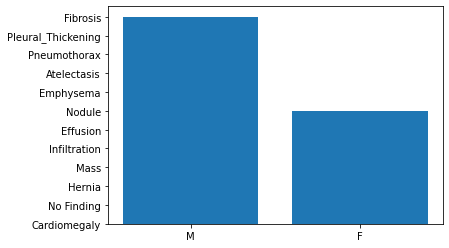

In [ ]:
import matplotlib.pyplot as plt
#used bar plot the see Patient Gender and their diseases
plt.bar(df.iloc[:100]['Patient Gender'], df.iloc[:100]['Finding Labels'])

In [ ]:
set(df.iloc[:,1])

{'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax'}

In [ ]:
import os
results = [(os.listdir('/content/drive/MyDrive/images'))]
results

list

In [ ]:
#to get the index of the images
dataf = pd.DataFrame(results).transpose()
dataf.columns = ['Image Index']
print(dataf)

           Image Index
0     00000249_000.png
1     00000231_002.png
2     00000226_000.png
3     00000251_000.png
4     00000246_013.png
...                ...
1896  00000263_000.png
1897  00000262_000.png
1898  00000232_001.png
1899  00000230_000.png
1900  00000246_011.png

[1901 rows x 1 columns]


In [ ]:
df2=df.loc[:,['Image Index','Finding Labels']]

In [ ]:
df2

,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly
2,00000001_002.png,Cardiomegaly
3,00000002_000.png,No Finding
4,00000003_001.png,Hernia
...,...,...
1877,00000491_021.png,Mass
1878,00000491_022.png,Infiltration
1879,00000491_023.png,Fibrosis
1880,00000491_024.png,No Finding


In [ ]:
#to find all the duplicate ones in the dataset
df_all = pd.concat([df2,dataf])
df_all["duplicate"] = df_all.duplicated(keep='first',subset=['Image Index'])
df_all["labels"]=df2['Finding Labels']
df3=pd.DataFrame(columns = ["Image Index","Finding Labels"])
for index, row in df_all.iterrows():
  if row['duplicate'] and row['labels']:
     print("Index: {} and Label:{}".format(row['Image Index'],row['labels']))



Index: 00000249_000.png and Label:Cardiomegaly
Index: 00000231_002.png and Label:Cardiomegaly
Index: 00000226_000.png and Label:Cardiomegaly
Index: 00000251_000.png and Label:No Finding
Index: 00000246_013.png and Label:Hernia
Index: 00000239_004.png and Label:Hernia
Index: 00000241_001.png and Label:Hernia
Index: 00000261_002.png and Label:Hernia
Index: 00000246_008.png and Label:Hernia
Index: 00000246_006.png and Label:Hernia
Index: 00000244_001.png and Label:Hernia
Index: 00000246_012.png and Label:Hernia
Index: 00000225_001.png and Label:Mass
Index: 00000239_002.png and Label:No Finding
Index: 00000224_001.png and Label:No Finding
Index: 00000235_000.png and Label:No Finding
Index: 00000265_005.png and Label:No Finding
Index: 00000231_000.png and Label:No Finding
Index: 00000248_025.png and Label:No Finding
Index: 00000248_011.png and Label:Infiltration
Index: 00000236_000.png and Label:Effusion
Index: 00000255_002.png and Label:No Finding
Index: 00000248_018.png and Label:No Findi

In [ ]:
#to drop any null values
final_df= df_all.dropna()
final_df.loc[:,['Image Index','Finding Labels']]


,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly
2,00000001_002.png,Cardiomegaly
3,00000002_000.png,No Finding
4,00000003_001.png,Hernia
...,...,...
1877,00000491_021.png,Mass
1878,00000491_022.png,Infiltration
1879,00000491_023.png,Fibrosis
1880,00000491_024.png,No Finding


In [ ]:
set(final_df.iloc[:,1])

{'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax'}

In [ ]:
#to create a list contains disease names
class_names = list(final_df.iloc[:,1].unique())
class_names

['Cardiomegaly',
 'No Finding',
 'Hernia',
 'Mass',
 'Infiltration',
 'Effusion',
 'Nodule',
 'Emphysema',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Fibrosis',
 'Consolidation',
 'Edema',
 'Pneumonia']

In [ ]:
import shutil

In [ ]:
for i in class_names: #creating subfolders 
    os.makedirs(os.path.join('/content/COVID-19/',i))

In [ ]:
for i in class_names:
  for c in list(final_df[final_df['Finding Labels']== i]['Image Index']):   
 # Creating path to the image
    get_image = os.path.join('/content/drive/MyDrive/images',c)       
     # get_image to that path
    if not os.path.exists('images/'+c+i):
       # move the image to this path
     move_image = shutil.copy(get_image,'/content/COVID-19/'+i) 
     



In [ ]:
from glob import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.densenet import DenseNet169
from sklearn.model_selection import cross_validate, KFold
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc
from google.colab import drive

In [ ]:
#creating path for images 
images_path = {}
images_path["Covid"] = glob("/content/COVID-19/Covid-19/*.png")
images_path["Covid"] += glob("/content/COVID-19/Covid-19/*.jpeg")
images_path["Covid"] += glob("/content/COVID-19/Covid-19/*.jpg")

images_path["NoFindings"] = glob("/content/COVID-19//No_findings/*.png")

images_path["Pneumonia"] = glob("/content/COVID-19/Pneumonia/*.png")

images_path["Atelectasis"] = glob("/content/COVID-19/Atelectasis/*.png")

images_path["Cardiomegaly"] = glob("/content/COVID-19/Cardiomegaly/*.png")

images_path["Edema"] = glob("/content/COVID-19/Edema/*.png")

images_path["Effusion"] = glob("/content/COVID-19/Effusion/*.png")

images_path["Fibrosis"] = glob("/content/COVID-19/Fibrosis/*.png")

images_path["Hernia"] = glob("/content/COVID-19/Hernia/*.png")

images_path["Infiltration"] = glob("/content/COVID-19/Infiltration/*.png")

images_path["Mass"] = glob("/content/COVID-19/Mass/*.png")

images_path["NoFindings"] = glob("/content/COVID-19/No Finding/*.png")

images_path["Nodule"] = glob("/content/COVID-19/Nodule/*.png")

images_path["Pneumonia"] = glob("/content/COVID-19/Pneumonia1/*.png")

images_path["Pleural_Thickening"] = glob("/content/COVID-19/Pleural_Thickening/*.png")

images_path["Pneumothorax"] = glob("/content/COVID-19/Pneumothorax/*.png")


print(images_path["Covid"])
print(images_path["NoFindings"])
print(images_path["Pneumonia"])

images_class = {
    "Covid": 0,
    "Pneumonia": 1,
    "Atelectasis": 2,
    "Cardiomegaly": 3,
    "Edema": 4,
    "Effusion": 5,
    "Fibrosis": 6,
    "Hernia": 7,
    "Infiltration": 8,
    "Mass": 9,
    "NoFindings": 10,
    "Nodule": 11,
    "Pneumonia": 12,
    "Pleural_Thickening": 13,
    "Pneumothorax": 14,
  
}

[]
['/content/COVID-19/No Finding/00000426_002.png', '/content/COVID-19/No Finding/00000242_004.png', '/content/COVID-19/No Finding/00000262_000.png', '/content/COVID-19/No Finding/00000278_006.png', '/content/COVID-19/No Finding/00000372_010.png', '/content/COVID-19/No Finding/00000105_001.png', '/content/COVID-19/No Finding/00000231_005.png', '/content/COVID-19/No Finding/00000237_000.png', '/content/COVID-19/No Finding/00000169_000.png', '/content/COVID-19/No Finding/00000192_000.png', '/content/COVID-19/No Finding/00000265_002.png', '/content/COVID-19/No Finding/00000151_001.png', '/content/COVID-19/No Finding/00000183_001.png', '/content/COVID-19/No Finding/00000468_044.png', '/content/COVID-19/No Finding/00000459_036.png', '/content/COVID-19/No Finding/00000325_000.png', '/content/COVID-19/No Finding/00000465_001.png', '/content/COVID-19/No Finding/00000193_017.png', '/content/COVID-19/No Finding/00000035_000.png', '/content/COVID-19/No Finding/00000459_013.png', '/content/COVID-

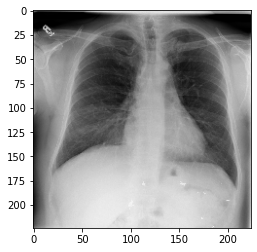

In [ ]:
X = []
Y = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X.append(image)
        Y.append(images_class[label])
#to show images from dataset
plt.imshow(X[0])
plt.show()

(1769, 224, 224, 3)
(1769,)


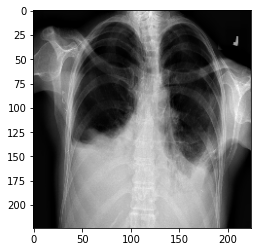

In [ ]:
print(np.array(X).shape)
print(np.array(Y).shape)
plt.imshow(X[1000])

In [ ]:
x = np.array(X)
y = np.array(Y)

# initial pre trained model
pre_trained_models = {}
pre_trained_models["DenseNet169"] = DenseNet169(include_top=False, input_shape=(224, 224, 3), pooling="avg")

51888128/51877672 [==============================] - 0s 0us/step


In [ ]:
#splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=80)

X_train = pre_trained_models["DenseNet169"].predict(X_train)
X_test = pre_trained_models["DenseNet169"].predict(X_test)

In [ ]:
#XGB Classifier
result = {}

XGB_Classifier = XGBClassifier(learning_rate=0.5, n_estimators=100, random_state=0, seed=0, gamma=0)

In [ ]:
XGB_Classifier.fit(X_train, Y_train)

Y_pred = XGB_Classifier.predict(X_test)

In [ ]:
xgb_tr = XGB_Classifier.score(X_train, Y_train)
xgb_tr

1.0

In [ ]:
result["Accuracy score"] = accuracy_score(Y_test, Y_pred)
result["confusion matrix"] = confusion_matrix(Y_test, Y_pred)
result["f1 score"] = f1_score(Y_test, Y_pred, average="macro")
result["precision score"] = precision_score(Y_test, Y_pred, average="macro")
result["Sensitivity"] = result["confusion matrix"][0,0] / (result["confusion matrix"][0,0] + result["confusion matrix"][0,1])
result["Specifity"] = result["confusion matrix"][1,1] / (result["confusion matrix"][1,0] + result["confusion matrix"][1,1])

print(f"\n============")
print(f"\nAccuracy score : ", result["Accuracy score"])
print(f"\nconfusion matrix : \n", result["confusion matrix"])
print(f"\nf1 score : ", result["f1 score"])
print(f"\nprecision score : ", result["precision score"])
print(f"\nSpecifity : ", result["Specifity"])
print(f"\nSensitivity : ", result["Sensitivity"])



Accuracy score :  0.480225988700565

confusion matrix : 
 [[  4   2   0   1   0   0   0   0  34   0   0   0]
 [  5   2   0   1   0   0   1   0  18   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   1   2   1   0   0   0   0  21   0   0   1]
 [  0   0   0   1   0   0   2   0   8   0   0   0]
 [  0   0   0   0   0   0   0   0   4   0   0   0]
 [  0   1   0   1   0   0   1   0  35   0   0   1]
 [  0   0   0   1   0   0   0   1   5   0   0   0]
 [  7   2   1   5   0   0   1   0 161   0   1   1]
 [  0   0   0   0   0   0   0   0   9   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0]
 [  1   1   0   0   0   0   0   0   6   0   0   0]]

f1 score :  0.1052366873652607

precision score :  0.18889222255558888

Specifity :  0.2857142857142857

Sensitivity :  0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


(354, 2)
(354, 2)


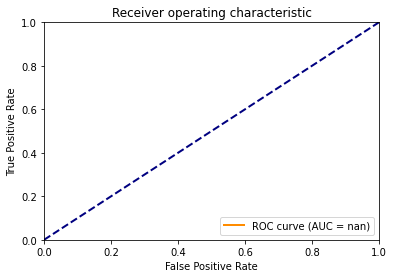

In [ ]:
from sklearn.metrics import roc_curve, auc

from sklearn import preprocessing
y_test = preprocessing.label_binarize(Y_test, classes=[0, 1])
y_pred = preprocessing.label_binarize(Y_pred, classes=[0, 1])
print(y_test.shape)
print(y_test.shape)

n_classes = list(Y_test.shape)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("roc.svg", format="svg")
plt.show()

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth = 15, random_state = 0)
rfc.fit(X_train, Y_train)
rfc_tr = rfc.score(X_train, Y_train)
rfc_tr

0.9724381625441696

In [ ]:
rfc_sc = rfc.score(X_test,Y_test)
rfc_sc

0.5112994350282486

In [ ]:
#Ada Boost
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators = 250, random_state = 0)
clf.fit(X_train, Y_train)
clf_tr = clf.score(X_train, Y_train)
clf_tr

0.5201413427561837

In [ ]:
clf_sc = clf.score(X_test,Y_test)
clf_sc

0.5

In [ ]:
# initialize data of lists.
data = {'XGBoost': [xgb_tr, result["Accuracy score"]],
        'RandomForest': [rfc_tr, rfc_sc],
        'AdaBoost': [clf_tr, clf_sc]}
 
# Creates pandas DataFrame.
df = pd.DataFrame(data, index=['Train score',
                               'Test score'])

# print the data
df

,XGBoost,RandomForest,AdaBoost
Train score,1.000000,0.972438,0.520141
Test score,0.480226,0.511299,0.500000


Cross validation 

In [ ]:
#Random Forest cross val
training_score_rfc = cross_val_score(rfc, X_train, Y_train, cv=10)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Random Forest Classifier Has a training score of", round(training_score_rfc.mean(), 2) * 100, "% accuracy score")

Random Forest Classifier Has a training score of 53.0 % accuracy score


In [ ]:
training_score_clf = cross_val_score(clf, X_train, Y_train, cv=10)

In [ ]:
print("AdaBoost Classifier Has a training score of", round(training_score_clf.mean(), 2) * 100, "% accuracy score")

AdaBoost Classifier Has a training score of 52.0 % accuracy score


In [ ]:
training_score_xgb = cross_val_score(XGB_Classifier, X_train, Y_train, cv=10)

In [ ]:
print("XGBoost Has a training score of", round(training_score_xgb.mean(), 2) * 100, "% accuracy score")

XGBoost Has a training score of 51.0 % accuracy score
